<a href="https://colab.research.google.com/github/domywillygithub/Codes/blob/main/Triple_Exponential_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# Load the retail sales data for electricity in the US
data = pd.read_csv('/content/Retail_sales_of_electricity_United_States_monthly.csv', index_col='Month',skiprows=4, parse_dates=True)
data.head()

,all sectors million kilowatthours,residential million kilowatthours,commercial million kilowatthours,industrial million kilowatthours
Month,,,,
2022-12-01,NaN,NaN,NaN,NaN
2022-11-01,325753.15136,132981.77952,111782.50079,80396.47695
2022-10-01,289880.06893,103944.79935,104960.71008,80426.79310
2022-10-01,NaN,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN,NaN


In [ ]:
data = data.iloc[::-1]
df = data.dropna()
df

,all sectors million kilowatthours,residential million kilowatthours,commercial million kilowatthours,industrial million kilowatthours
Month,,,,
2000-12-01,310816.06880,127065.78354,90825.27235,83477.36044
2001-01-01,272334.73804,99877.67304,81466.85778,82248.23193
2001-02-01,269298.40142,92804.58576,84064.24963,83521.51752
2001-03-01,254390.93545,82453.78260,81060.53414,82253.07658
2001-04-01,264490.49166,81731.15295,87470.74429,86096.58080
...,...,...,...,...
2022-07-01,387931.92889,161645.21104,134163.90096,91587.81998
2022-08-01,338610.69454,130378.79803,122533.00354,85141.39962
2022-09-01,295613.84380,100724.33252,110297.45731,84051.95179


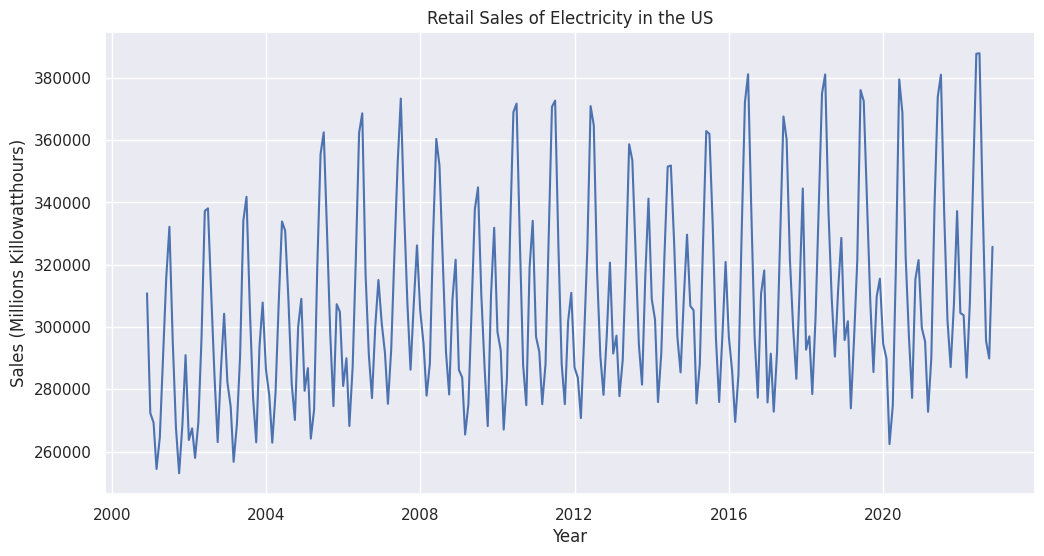

In [ ]:
# Plot the data
sns.set()
plt.figure(figsize=(12, 6))
plt.plot(df['all sectors million kilowatthours'])
plt.title('Retail Sales of Electricity in the US')
plt.xlabel('Year')
plt.ylabel('Sales (Millions Killowatthours)')
plt.show()

In [ ]:
result_additive = seasonal_decompose(df['all sectors million kilowatthours'], model='Additive')
result_multiplicative = seasonal_decompose(df['all sectors million kilowatthours'], model='Multiplicative')

In [ ]:
train_data = df.iloc[:205]
test_data = df.iloc[205:]

In [ ]:
fitHoltWinter = ExponentialSmoothing(train_data['all sectors million kilowatthours'],
                                     trend = 'add', seasonal = 'add', seasonal_periods=12).fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
fcastHoltWinter = fitHoltWinter.forecast(len(test_data)+12).rename('HW Predict')

In [ ]:
fcastHoltWinter

2018-01-01    310540.197980
2018-02-01    310780.163615
2018-03-01    290560.555828
2018-04-01    307027.859079
2018-05-01    343143.202775
                  ...      
2023-07-01    406432.517957
2023-08-01    370192.424254
2023-09-01    340365.678295
2023-10-01    326435.740704
2023-11-01    357090.754388
Freq: MS, Name: HW Predict, Length: 71, dtype: float64

<Axes: xlabel='Month'>

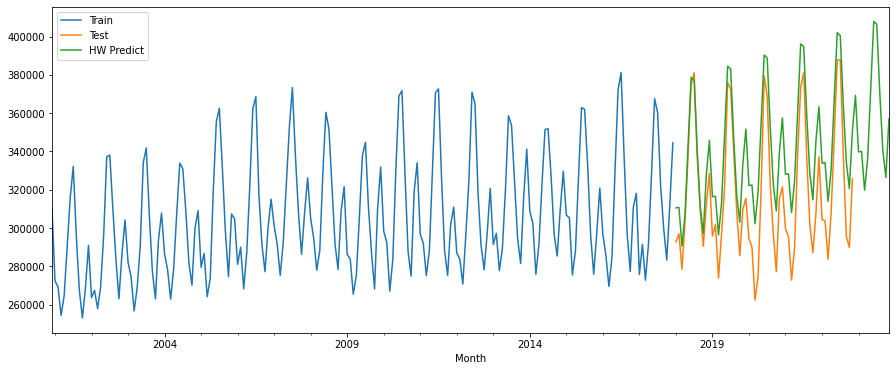

In [ ]:
plt.figure(figsize=(15, 6))
train_data['all sectors million kilowatthours'].plot(legend=True, label='Train')
test_data['all sectors million kilowatthours'].plot(legend=True, label='Test')
fcastHoltWinter.plot(legend=True, label='HW Predict')

In [ ]:
# Calculate the MAPE for the additive model
from sklearn.metrics import mean_squared_error

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(test_data['all sectors million kilowatthours'], fcastHoltWinter[:len(test_data['all sectors million kilowatthours'])], squared=False)

# Print the MAPE
print("RMse for both Additive:", rmse)

RMse for both Additive: 24308.66732372088


In [ ]:
fitHoltWinter = ExponentialSmoothing(train_data['all sectors million kilowatthours'],
                                     trend = 'mul', seasonal = 'mul', seasonal_periods=12).fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
fcastHoltWinter = fitHoltWinter.forecast(len(test_data)+12).rename('HW Predict')

<Axes: xlabel='Month'>

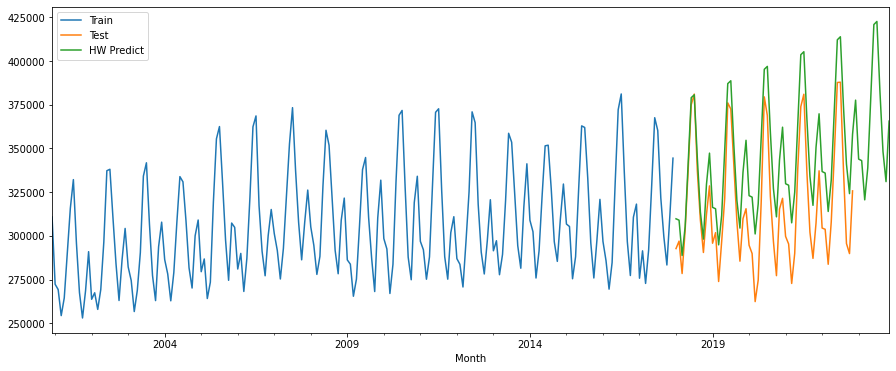

In [ ]:
plt.figure(figsize=(15, 6))
train_data['all sectors million kilowatthours'].plot(legend=True, label='Train')
test_data['all sectors million kilowatthours'].plot(legend=True, label='Test')
fcastHoltWinter.plot(legend=True, label='HW Predict')

In [ ]:
# Calculate the MAPE for the Multiplicative model
from sklearn.metrics import mean_squared_error

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(test_data['all sectors million kilowatthours'], fcastHoltWinter[:len(test_data['all sectors million kilowatthours'])], squared=False)

# Print the MAPE
print("RMse for both Multiplicative:", rmse)

RMse for both Multiplicative: 27177.362892419475


In [ ]:
fitHoltWinter = ExponentialSmoothing(train_data['all sectors million kilowatthours'],
                                     trend = 'add', seasonal = 'mul', seasonal_periods=12).fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
fcastHoltWinter = fitHoltWinter.forecast(len(test_data)+12).rename('HW Predict')

<Axes: xlabel='Month'>

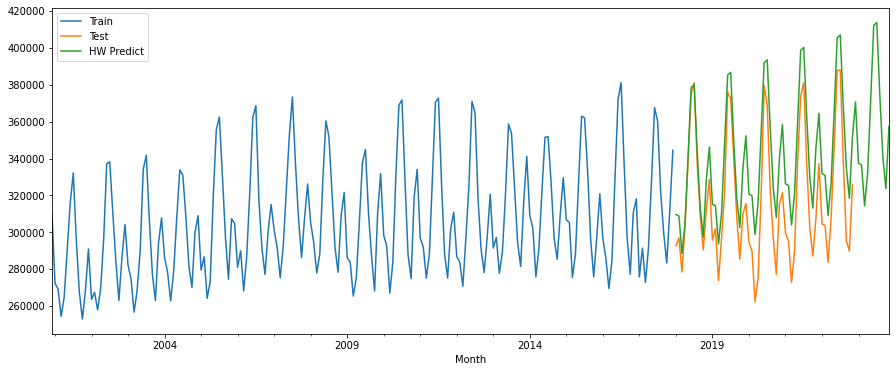

In [ ]:
plt.figure(figsize=(15, 6))
train_data['all sectors million kilowatthours'].plot(legend=True, label='Train')
test_data['all sectors million kilowatthours'].plot(legend=True, label='Test')
fcastHoltWinter.plot(legend=True, label='HW Predict')

In [ ]:
# Calculate the MAPE for the trend = Additive and season=Multiplicative model
from sklearn.metrics import mean_squared_error

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(test_data['all sectors million kilowatthours'], fcastHoltWinter[:len(test_data['all sectors million kilowatthours'])], squared=False)

# Print the MAPE
print("RMSE for trend =Multiplicative and season=Additive:", rmse)

RMSE for trend =Multiplicative and season=Additive: 23932.162999573255


In [ ]:
fitHoltWinter = ExponentialSmoothing(train_data['all sectors million kilowatthours'],
                                     trend = 'mul', seasonal = 'add', seasonal_periods=12).fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
fcastHoltWinter = fitHoltWinter.forecast(len(test_data)+12).rename('HW Predict')

<Axes: xlabel='Month'>

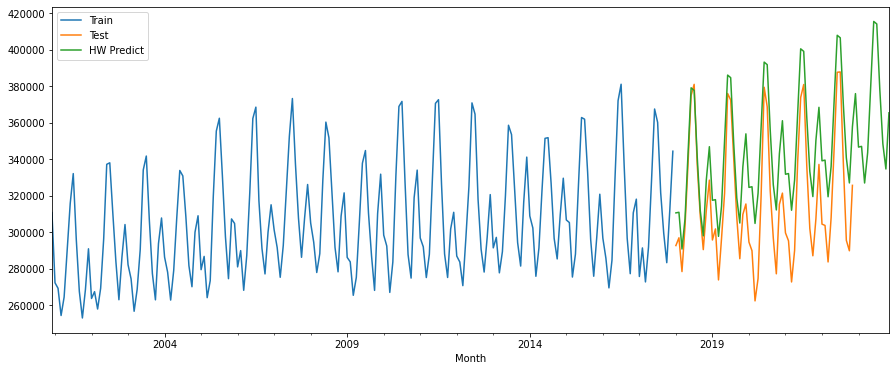

In [ ]:
plt.figure(figsize=(15, 6))
train_data['all sectors million kilowatthours'].plot(legend=True, label='Train')
test_data['all sectors million kilowatthours'].plot(legend=True, label='Test')
fcastHoltWinter.plot(legend=True, label='HW Predict')

In [ ]:
# Calculate the MAPE for the trend =Multiplicative and season=additive model
from sklearn.metrics import mean_squared_error

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(test_data['all sectors million kilowatthours'], fcastHoltWinter[:len(test_data['all sectors million kilowatthours'])], squared=False)

# Print the MAPE
print("RMSE for both trend=Multiplicative and season=Additive:", rmse)

RMSE for both trend=Multiplicative and season=Additive: 27580.86548821638
